In [ ]:
# import zipfile

# zip_path = '/content/drive/MyDrive/rock_paper_scissors.zip'

# zip_ref = zipfile.Zipfile(zip_path, "r")
# zip_ref.extractall()
# zip_ref.close()

import zipfile

zip_path = '/content/drive/MyDrive/rock_paper_scissors.zip'

zip_ref = zipfile.ZipFile(zip_path, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = "/content/dataset"
classes = ["rock", 'paper', 'scissors']

train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# create directories for the split
output_base_dir = '/content/split_dataset'
for set_type in ['train', 'val', 'test']:
  for cl in classes:
    os.makedirs(os.path.join(output_base_dir, set_type, cl), exist_ok=True)

def split_data(class_name):
  src_dir = os.path.join(base_dir, class_name)
  all_files = os.listdir(src_dir)

  # Splitting the files
  train_files, test_files = train_test_split(all_files, test_size=test_ratio, random_state=42)
  train_files, val_files = train_test_split(train_files, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

  # Copy the files to the respective train, val, and test directories
  for file in train_files:
    shutil.copy(os.path.join(src_dir, file), os.path.join(output_base_dir, 'train', class_name, file))
  for file in val_files:
    shutil.copy(os.path.join(src_dir, file), os.path.join(output_base_dir, 'val', class_name, file))
  for file in test_files:
    shutil.copy(os.path.join(src_dir, file), os.path.join(output_base_dir, 'test', class_name, file))

# Splitting data for each class
for cl in classes:
    split_data(cl)

In [ ]:
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

In [ ]:
rock_train_count = count_files(os.path.join("split_dataset", 'train', 'rock'))
rock_val_count = count_files(os.path.join("split_dataset", 'val', 'rock'))
rock_test_count = count_files(os.path.join("split_dataset", 'test', 'rock'))

rock_train_count, rock_val_count, rock_test_count

(435, 145, 146)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values (between 0 and 255) to the [0, 1] interval
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

# Validation and test data generators without data augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling

In [ ]:
# Directory paths
train_dir = '/content/split_dataset/train'
val_dir = '/content/split_dataset/val'
test_dir = '/content/split_dataset/test'

# Train data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)

# Validation data
val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)

# Test data
test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)


Found 1311 images belonging to 3 classes.
Found 438 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


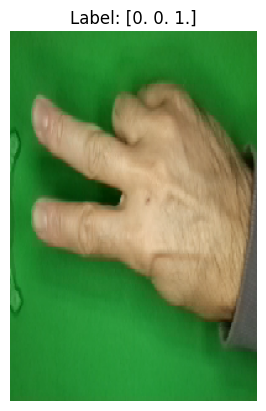

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

# Plot the first image
plt.imshow(images[0])
plt.title(f'Label: {labels[0]}')
plt.axis('off')  # Turn off axis numbers and labels
plt.show()

## Conv2D Model

In [ ]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(300, 200, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax") # binary activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
41/41 [==============================] - 13s 183ms/step - loss: 1.0139 - accuracy: 0.4630 - val_loss: 0.7730 - val_accuracy: 0.7260
Epoch 2/5
41/41 [==============================] - 7s 161ms/step - loss: 0.5803 - accuracy: 0.7933 - val_loss: 0.5830 - val_accuracy: 0.8128
Epoch 3/5
41/41 [==============================] - 6s 152ms/step - loss: 0.4430 - accuracy: 0.8619 - val_loss: 0.5497 - val_accuracy: 0.8151
Epoch 4/5
41/41 [==============================] - 7s 165ms/step - loss: 0.3553 - accuracy: 0.8810 - val_loss: 0.4403 - val_accuracy: 0.8653
Epoch 5/5
41/41 [==============================] - 6s 155ms/step - loss: 0.2223 - accuracy: 0.9268 - val_loss: 0.3966 - val_accuracy: 0.8767


In [ ]:
model_1.evaluate(test_data)

14/14 [==============================] - 2s 131ms/step - loss: 0.2488 - accuracy: 0.9294


[0.2488280087709427, 0.9293849468231201]

In [ ]:
images[0]

array([[[0.12941177, 0.47058827, 0.13333334],
        [0.12941177, 0.45882356, 0.1254902 ],
        [0.13333334, 0.46274513, 0.12941177],
        ...,
        [0.14901961, 0.4784314 , 0.14509805],
        [0.14901961, 0.48235297, 0.13725491],
        [0.14901961, 0.4784314 , 0.14509805]],

       [[0.12156864, 0.4666667 , 0.13725491],
        [0.12941177, 0.47450984, 0.14509805],
        [0.11764707, 0.47450984, 0.14901961],
        ...,
        [0.14509805, 0.48235297, 0.14509805],
        [0.14509805, 0.48627454, 0.13725491],
        [0.14117648, 0.4784314 , 0.14117648]],

       [[0.12156864, 0.4666667 , 0.13725491],
        [0.12941177, 0.47450984, 0.14509805],
        [0.11764707, 0.47450984, 0.14901961],
        ...,
        [0.14509805, 0.48235297, 0.14509805],
        [0.14509805, 0.48627454, 0.13725491],
        [0.14117648, 0.4784314 , 0.14117648]],

       ...,

       [[0.12156864, 0.4784314 , 0.15294118],
        [0.1254902 , 0.48235297, 0.15686275],
        [0.1254902 , 0

In [ ]:
predictions = model_1.predict([images])
predictions

1/1 [==============================] - 0s 126ms/step


array([[3.35873038e-01, 1.68222265e-04, 6.63958728e-01],
       [7.60472566e-02, 6.81754842e-04, 9.23271060e-01],
       [9.96351600e-01, 2.08219490e-03, 1.56619889e-03],
       [9.67921168e-02, 7.51886666e-01, 1.51321217e-01],
       [9.83195007e-01, 1.67253315e-02, 7.97066386e-05],
       [4.26874310e-03, 9.95731294e-01, 6.48828680e-09],
       [9.99548972e-01, 2.93304474e-04, 1.57640301e-04],
       [1.30010524e-03, 2.76130810e-02, 9.71086800e-01],
       [9.97180194e-02, 9.00086939e-01, 1.94981170e-04],
       [9.99777615e-01, 1.73158580e-04, 4.91718092e-05],
       [9.91607904e-01, 8.36058147e-03, 3.15630205e-05],
       [4.12127655e-03, 9.95698810e-01, 1.79974086e-04],
       [2.50970989e-01, 1.54507591e-03, 7.47483909e-01],
       [2.18562949e-02, 9.66637611e-01, 1.15061002e-02],
       [1.14688635e-01, 1.70325428e-01, 7.14985907e-01],
       [5.60664356e-01, 3.03724617e-01, 1.35610968e-01],
       [9.31807160e-01, 4.61522005e-02, 2.20405664e-02],
       [2.05090060e-03, 4.81823

In [ ]:
def display_predictions(predictions, imgs):
    for i, prediction in enumerate(predictions):
      # Format the prediction to show probabilities as percentages
      formatted_prediction = [f"{prob:.2%}" for prob in prediction]

      plt.imshow(imgs[i])
      plt.axis('off')  # Turn off axis numbers and labels
      plt.show()
      print(f"Image {i + 1}: {', '.join(formatted_prediction)}")

The percentages are displayed as paper, rock, scissors

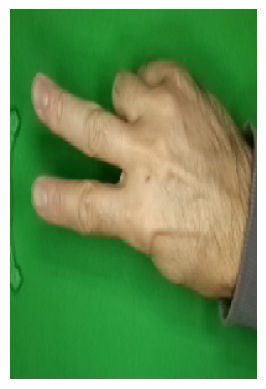

Image 1: 33.59%, 0.02%, 66.40%


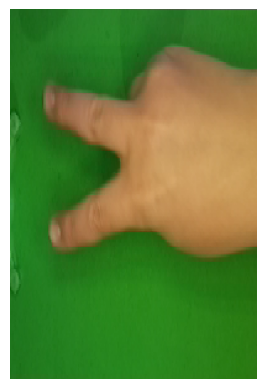

Image 2: 7.60%, 0.07%, 92.33%


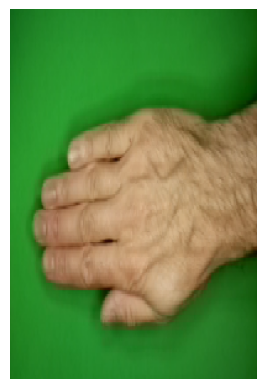

Image 3: 99.64%, 0.21%, 0.16%


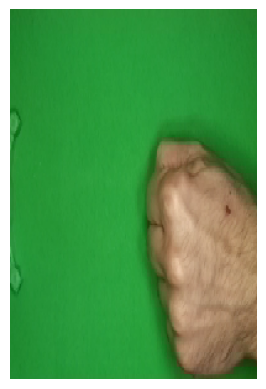

Image 4: 9.68%, 75.19%, 15.13%


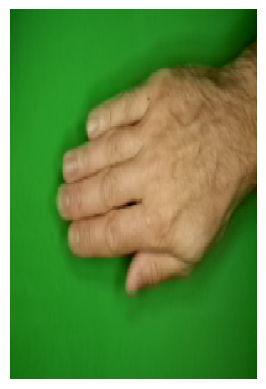

Image 5: 98.32%, 1.67%, 0.01%


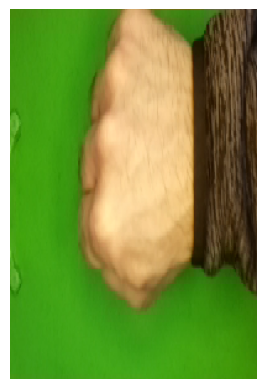

Image 6: 0.43%, 99.57%, 0.00%


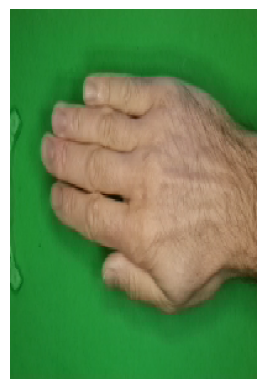

Image 7: 99.95%, 0.03%, 0.02%


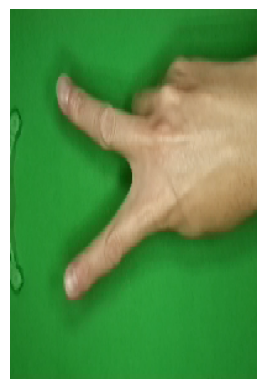

Image 8: 0.13%, 2.76%, 97.11%


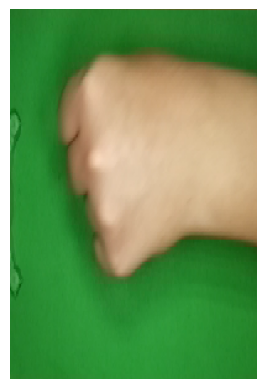

Image 9: 9.97%, 90.01%, 0.02%


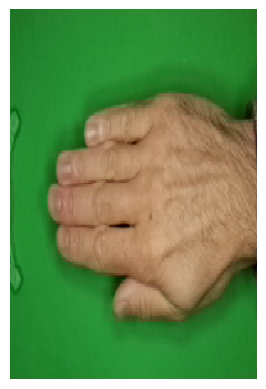

Image 10: 99.98%, 0.02%, 0.00%


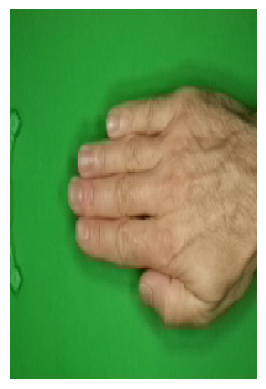

Image 11: 99.16%, 0.84%, 0.00%


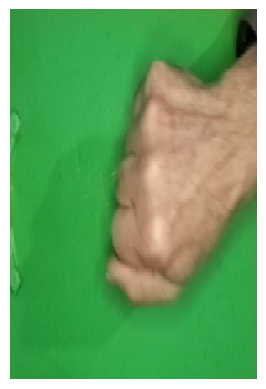

Image 12: 0.41%, 99.57%, 0.02%


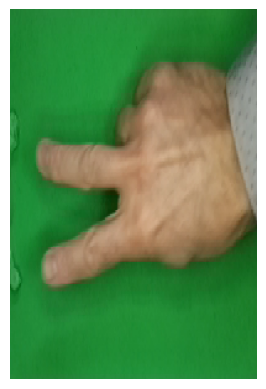

Image 13: 25.10%, 0.15%, 74.75%


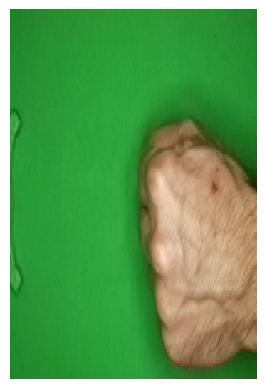

Image 14: 2.19%, 96.66%, 1.15%


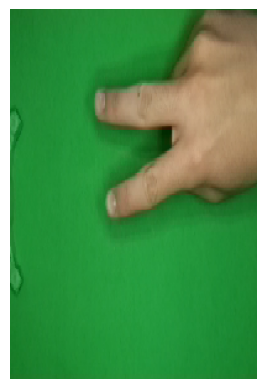

Image 15: 11.47%, 17.03%, 71.50%


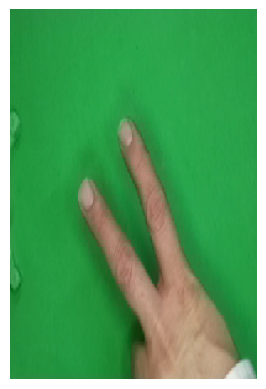

Image 16: 56.07%, 30.37%, 13.56%


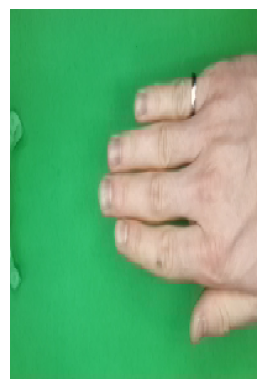

Image 17: 93.18%, 4.62%, 2.20%


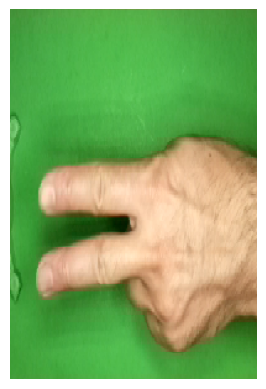

Image 18: 0.21%, 0.00%, 99.79%


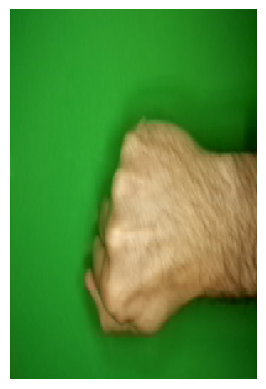

Image 19: 0.03%, 99.96%, 0.01%


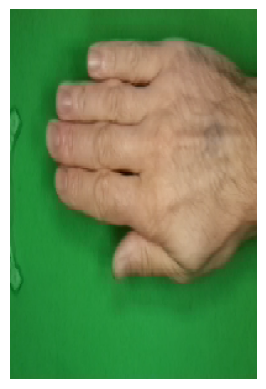

Image 20: 99.65%, 0.21%, 0.14%


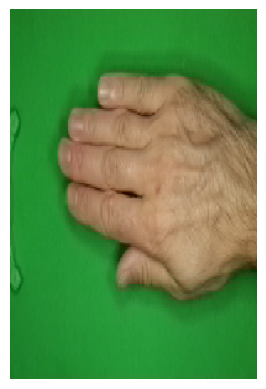

Image 21: 98.59%, 1.39%, 0.02%


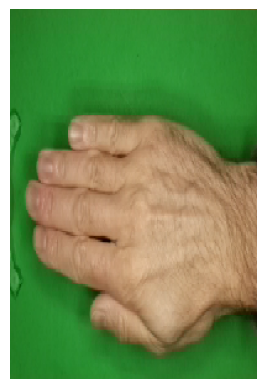

Image 22: 99.99%, 0.00%, 0.01%


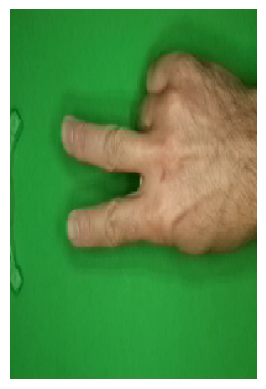

Image 23: 9.74%, 0.83%, 89.42%


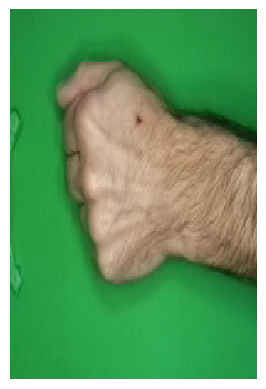

Image 24: 31.80%, 67.30%, 0.91%


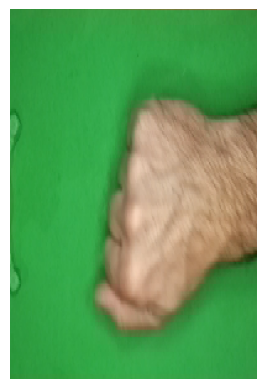

Image 25: 0.19%, 99.79%, 0.02%


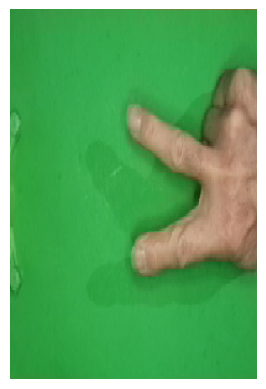

Image 26: 2.43%, 8.07%, 89.50%


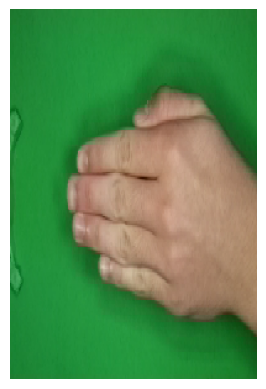

Image 27: 94.50%, 5.48%, 0.02%


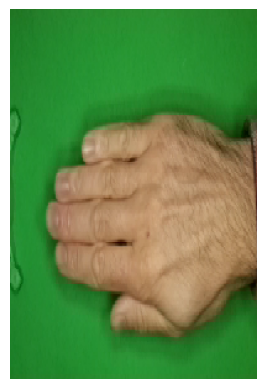

Image 28: 99.80%, 0.15%, 0.05%


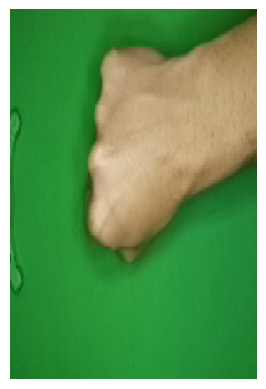

Image 29: 37.25%, 62.71%, 0.04%


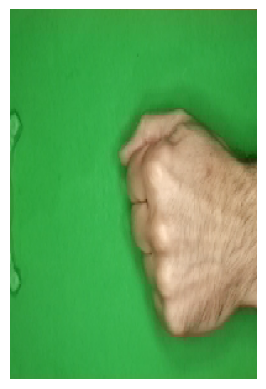

Image 30: 3.35%, 94.24%, 2.41%


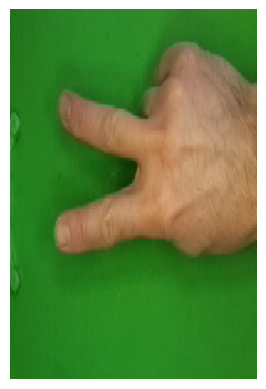

Image 31: 2.70%, 0.03%, 97.27%


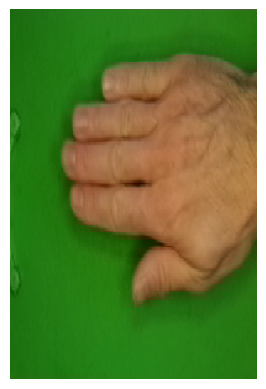

Image 32: 99.55%, 0.45%, 0.01%


In [ ]:
display_predictions(predictions, images)

In [ ]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

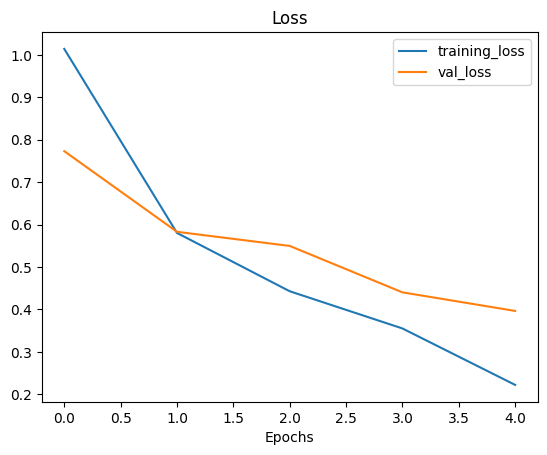

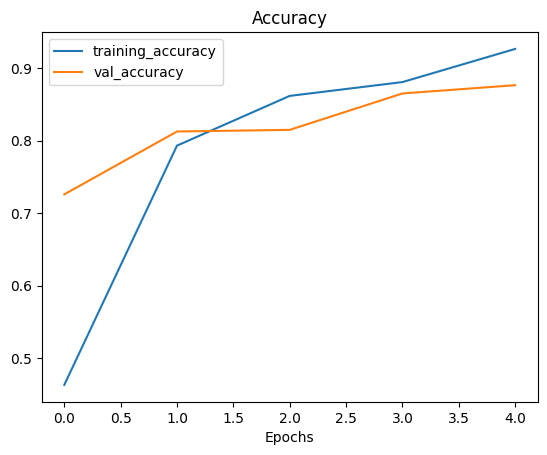

In [ ]:
plot_loss_curves(history_1)

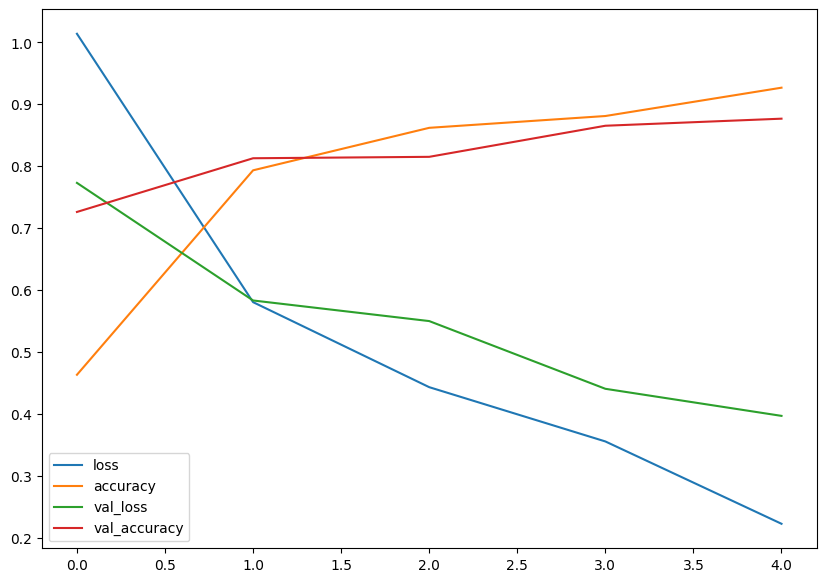

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

> 🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 198, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 196, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 98, 10)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 96, 10)       910       
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 94, 10)       910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 72, 47, 10)        0         
 g2D)                                                   

## Model 2: Better image augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values (between 0 and 255) to the [0, 1] interval
    # rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest'
)

# Validation and test data generators without data augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling

In [ ]:
# Directory paths
train_dir = '/content/split_dataset/train'
val_dir = '/content/split_dataset/val'
test_dir = '/content/split_dataset/test'

# Train data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)

# Validation data
val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)

# Test data
test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical' for multi-class classification
    seed=42
)

Found 1311 images belonging to 3 classes.
Found 438 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(300, 200, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax") # binary activation output
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
41/41 [==============================] - 24s 556ms/step - loss: 1.1041 - accuracy: 0.3257 - val_loss: 1.0967 - val_accuracy: 0.5594
Epoch 2/5
41/41 [==============================] - 22s 537ms/step - loss: 1.0933 - accuracy: 0.3631 - val_loss: 1.0845 - val_accuracy: 0.3950
Epoch 3/5
41/41 [==============================] - 25s 598ms/step - loss: 1.0525 - accuracy: 0.4493 - val_loss: 0.9021 - val_accuracy: 0.6142
Epoch 4/5
41/41 [==============================] - 26s 634ms/step - loss: 0.9397 - accuracy: 0.5713 - val_loss: 0.6622 - val_accuracy: 0.8105
Epoch 5/5
41/41 [==============================] - 22s 524ms/step - loss: 0.8283 - accuracy: 0.6331 - val_loss: 0.7165 - val_accuracy: 0.7215


In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
41/41 [==============================] - 23s 552ms/step - loss: 0.6740 - accuracy: 0.7292 - val_loss: 0.4720 - val_accuracy: 0.8128
Epoch 2/5
41/41 [==============================] - 23s 559ms/step - loss: 0.6614 - accuracy: 0.7254 - val_loss: 0.5470 - val_accuracy: 0.8014
Epoch 3/5
41/41 [==============================] - 23s 564ms/step - loss: 0.6053 - accuracy: 0.7574 - val_loss: 0.4198 - val_accuracy: 0.8744
Epoch 4/5
41/41 [==============================] - 24s 590ms/step - loss: 0.5760 - accuracy: 0.7635 - val_loss: 0.3593 - val_accuracy: 0.9178
Epoch 5/5
41/41 [==============================] - 23s 559ms/step - loss: 0.5464 - accuracy: 0.7918 - val_loss: 0.3503 - val_accuracy: 0.9155


In [ ]:
model_2.evaluate(test_data)

14/14 [==============================] - 2s 125ms/step - loss: 0.3273 - accuracy: 0.9248


[0.32725948095321655, 0.9248291850090027]

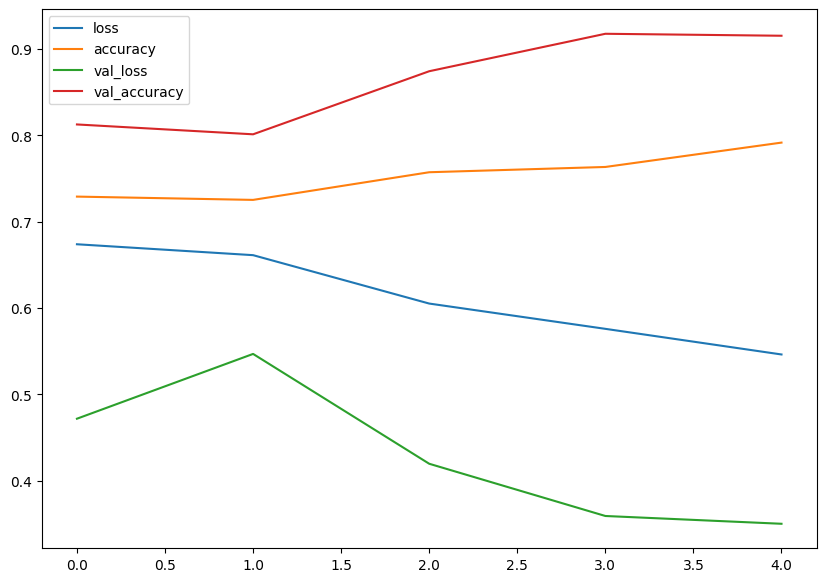

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [ ]:
# create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, width=300, height=200):
  """
  Reads image from filename and turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[width, height])
  # rescale the image(get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
class_names = ["paper", "rock", "scissors"]

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)
  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
scissors = load_and_prep_image("scissors.png")
scissors

<tf.Tensor: shape=(300, 200, 3), dtype=float32, numpy=
array([[[0.19705883, 0.55784315, 0.24607843],
        [0.19705883, 0.55784315, 0.24019608],
        [0.1882353 , 0.54901963, 0.24313726],
        ...,
        [0.47058824, 0.43137255, 0.23137255],
        [0.4745098 , 0.43235293, 0.23235294],
        [0.45392156, 0.4117647 , 0.21176471]],

       [[0.19019608, 0.55539215, 0.24117647],
        [0.19460784, 0.5612745 , 0.24558823],
        [0.18480392, 0.5495098 , 0.24166666],
        ...,
        [0.33872548, 0.49558824, 0.23872548],
        [0.3392157 , 0.49068627, 0.22990195],
        [0.32892156, 0.47745097, 0.21813725]],

       [[0.18415032, 0.554085  , 0.2370915 ],
        [0.19199346, 0.5643791 , 0.250817  ],
        [0.18251635, 0.5511438 , 0.24133988],
        ...,
        [0.20702615, 0.55996734, 0.24624184],
        [0.20392157, 0.54901963, 0.22745098],
        [0.20490196, 0.5441176 , 0.2254902 ]],

       ...,

       [[0.18022877, 0.57238567, 0.23513073],
        [0.18

In [ ]:
scissors.shape

TensorShape([300, 200, 3])

In [ ]:
pred = model_1.predict(tf.expand_dims(scissors, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.02433617, 0.72455186, 0.25111195]], dtype=float32)

In [ ]:
import numpy as np

predicted_index = np.argmax(pred, axis=1)[0]
predicted_class = class_names[predicted_index]
predicted_class

'rock'

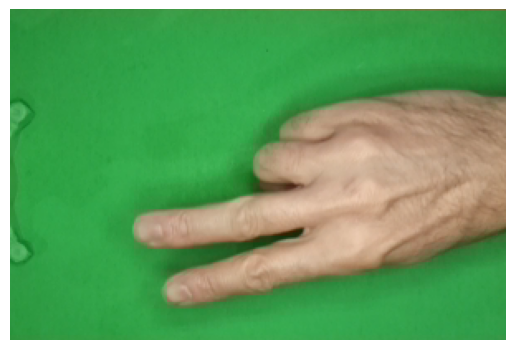

In [ ]:
image_path = 'scissors.png'
image = tf.keras.preprocessing.image.load_img(image_path)
image = tf.keras.preprocessing.image.img_to_array(image)

# Display the image
plt.imshow(image / 255)  # Normalize to [0,1] for matplotlib
plt.axis('off')  # Turn off axis numbers
plt.show()